In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Utils

In [3]:
def check_pre_condition(index, n):
    if n <= 0:
        raise ValueError("Negative length")
    
    if index < 0 or index >= n:
        raise ValueError("index out of range")

In [4]:
def Succ(MD, u):
    '''
        The Successors of a given node u in a graph represented by
        Distance matrix MD

        Args:
            MD (ndarray(n, n)) : The distance matrix representing the graph G
            u (int) : The node to calculate the successors for

        Raise:
            ValueError if the node u doesn't belong to the nodes set

    '''
    check_pre_condition(u, MD.shape[0])
    succ = [i for i in range(MD.shape[0]) if MD[u, i] < np.inf]
    return np.array(succ)

In [5]:
def deMaTL(M, plusOne = True):
    """
        Transform the adjacency matrix representation to
        a list dictonnary representation

        Args:
            M (ndarray(n, n)) : The adjacency matrix
            plusOne (bool, optional) : True if we generate the dictionnary
            in the human readable convention {1 .. n}. Otherwise {0 .. n-1}
            Default is True

        Returns:
            dictM (dict) : a dictionnary of successors lists

    """
    dictM = {}
    n = M.shape[0]
    for i in range(n):
        # Initialisation of the dict
        begin = i + 1 if plusOne else i
        dictM[begin] = [] 
        for j in range(n):
            end = j + 1 if plusOne else j  
            if M[i,j] == 1:
                dictM[begin].append(end)
    return dictM

In [6]:
def deTLaM(adj_dict):
    n = len(adj_dict)
    M = np.zeros((n,n), dtype=int)
    for i in adj_dict:
        for j in adj_dict[i]:
            M[i][j] = 1
    return M

In [7]:
def Arcs(M):
    """
        Extract the list of the edges of a valuated graph
        given by its distances matrix

        Args:
            M (ndarray(n, n)) : The distances matrix
        
        Returns:
            arcs (list) : The list of tuples representing all
            edges of the graph represented by the the matrix M
            in the form (begin, end, weight)
    """
    arcs = []
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            # Check if there is an edge from i to j
            if M[i, j] < np.inf:
                arcs.append((i, j, M[i, j]))
    return arcs

In [59]:
def plot_graph(M, seed = 42, show=True):
    """
        Plot a graph represented by his adjacency matrix

        Args:
            M (ndarray(n, n)) : The adjacency matrix of the graph

            seed (int, optional) : The seed value to ensure that we ll get 
            always the same order of nodes
            Default value is 42

            show (bool, optional) : show the graph
            Default is True
    """
    dictG = deMaTL(M)
    G = nx.from_dict_of_lists(dictG, create_using=nx.DiGraph)
    pos = nx.spring_layout(G, seed = seed)
    nx.draw(G, pos, with_labels=True, node_color='skyblue',
             node_size=1200, arrowstyle='->', arrowsize=15)
    if show:
        plt.show()


In [9]:
def plot_weighted_graph(M, seed = 42):
    """
        Plot a weighted graph represented by his distances matrix

        Args:
            M (ndarray(n, n)) : The adjacency matrix of the graph
            seed (int, optional) : The seed value to ensure that we ll get 
            always the same order of nodes
            Default value is 42
    """

    # We get the edges with their weights
    edges = Arcs(M)
    # We build the graph G from his edges list
    G = nx.DiGraph()
    G.add_weighted_edges_from(edges)
    pos = nx.spring_layout(G, seed = seed)
    nx.draw(G, pos, with_labels=True, node_color="lightblue",
            node_size=1200, arrowsize=20, font_weight="bold")
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, 
                                 font_color="red")
    plt.show()

In [10]:
def cycle_draw(cycle, title, seed = 42):
    """
        Plot a given cycle of a grah 

        Args:
            cycle (list) : The cycle

            seed (int, optional) : The seed value to ensure that we ll get 
            always the same order of nodes
            Default value is 42
        
            Raises:
                AssertionError if the cycle is empty
    """
    assert len(cycle) != 0, "The cycle is empty"

    edges = []
    for i in range(len(cycle) - 1):
        # build the edges
        edges.append([cycle[i], cycle[i+1]])

    # add the last edge to form a cycle  
    edges.append([cycle[0], cycle[-1]])

    plt.figure()
    G = nx.DiGraph()
    G.add_edges_from(edges)
    # Decide the positions of nodes randomly starting
    # from the given seed 
    pos = nx.spring_layout(G, seed = seed)
    
    # Plot the cycle
    nx.draw(G, pos, with_labels=True, node_color="lightblue",
            node_size=1200, arrowsize=20, font_weight="bold")
    
    # Add the title
    plt.title(title)
    plt.show()

In [11]:
def find_path(P, i, j):
    '''
        Find a path from i to j using the predecessors matrix

        Args:
            P (ndarray(n, n)) : The predecessors matrix
            i (int) : The origin node
            j (int) : The destination node

        Raise:
            ValueError if i or j is out of the domain of nodes

        Returns:
            path (array) : The path from i to j if it exists. 
            Otherwise it returns []
    '''
    P = P.copy()
    P -= 1
    i -= 1
    j -= 1
    check_pre_condition(i, len(P))
    check_pre_condition(j, len(P))
    
    # We initialise with the destination node
    path = [j+1]
    k = j
    while P[i, k] != -1 and P[i, k] != i:
        # Go back to the predecessor until we reach the origin
        # Or a node with no predecessor (no path case)
        k = P[i, k]
        path.insert(0, int(k)+1)

    # If there is no path
    if P[i, k] == -1:
        return []
    else:
        # We add the origin node to the path
        path.insert(0, i+1)
        return path

In [12]:
def shortest_path_from_origin(pi, dest, origin = 0):
    '''
        Find the shortest path from the node origin to the node dest

        Args:
            dest (int) : The node of the end
            pi (ndarray(n)) : The predecessors in the shortest path from the node s
            origin (int, optional) : The node of the origin of the shortest path.
            Default is 0

        Raise:
            ValueError if the origin node origin or the node dest
             don't belong to the nodes set

        Returns:
            path (list) : The shortest path from the node origin to the node dest
            If there is no path from origin to dest return an empty array

    '''
    dest -= 1
    origin -= 1
    pi = pi.copy()
    pi -= 1
    check_pre_condition(origin, len(pi))
    check_pre_condition(dest, len(pi))
    if dest == origin:
        return [dest + 1]
    
    pred = pi[dest]
    path = [int(pred) + 1, dest + 1]
    while pred != origin and pred != -1:
        pred = pi[pred]
        path.insert(0, int(pred)+1)

    # The case of no path
    if pred == -1:
        return []

    return path

In [13]:
def init_dijkstra(n, s = 0):
    '''
        Initialise the distance and predecessors arrays

        Args:
            n (int) : The number of nodes of the Graph
            s (int, optional) : The node of the origin of the shortest path.
            Default is 0
        
        Raise:
            ValueError if the node of the origin doesn't belong to the nodes set
                        Or if n is not a positive integer

        Returns:
            d (ndarray(1, n)) : The initialised distances, from the node s, array 
            pi (ndarray(1, n)) : The initialised The predecessors in the shortest 
            path from the node s array
    '''
    check_pre_condition(s, n)
    
    d = np.ones(n) * np.inf
    d[s] = 0
    pi = np.full(n, -1)
    return d, pi

In [14]:

def relacher(MD, u, v, d, pi):
    '''
        The Edge Relaxation procedure
        
        Args:
            MD (ndarray(n, n)) : The distance matrix representing the graph G
            u (int) : The node used in relaxation
            v (int) : The node to be relaxed
            d (ndarray(1, n)) : The distances, from the node s, array 
            pi (ndarray(1, n)) : The array of predecessors in the shortest path 
            from the node s
        
        Raise:
            ValueError if the nodes u and v don't belong to the nodes set
    '''
    check_pre_condition(u, MD.shape[0])
    check_pre_condition(v, MD.shape[0])
    
    if d[v] > d[u] + MD[u, v]:
        d[v] = d[u] + MD[u, v]
        pi[v] = u

# Roy-Warshall Algorithm

In [15]:
def Roy_warshall(M, trace=True):
    '''
        An implementation of the Roy-Warshall algorithm
        to determine the accessibility matrix modified
        to return the matrix of predecessors too

        Args:
            M (ndarray(n, n)) : Adjacency matrix 
            trace (boolean, optional) : Return the intermediate 
            R^k and P^k for k in {0 ... n-1}
            Default is True
        
        Returns:
            R (ndarray(n, n)) : The accessibility Matrix
            P (ndarray(n, n)) : The predecessors matrix 
    '''

    # Remainder : 
    #   Let k and n be positive integers,
    #   Let i and j be positive integers such that i < j
    #   Let (i, x_0, ..., x_n, j) be a path from i to j
    #   the matrix of paths of level <= k R^k is a matrix of booleans
    #   where R^k[i, j] iff max{x_0, ..., x_n} <= k
    #   the matrix of predecessors of level <= k P^k is a matrix of integers 
    #   where P^k[i, j] = the predecessor of j in a 
    #   path (i, ..., j) of level <= k
    #   -1 if such a path doesn't exist

    # Initialise R^0
    R = M.astype(bool).copy()
    # Trivial paths
    np.fill_diagonal(R, True)

    # Initialise P^0
    P = np.zeros(M.shape, dtype=int)
    for i in range(M.shape[0]):
        for j in range(M.shape[0]):
            # -1 for no predecessor
            P[i, j] = i if R[i, j] else -1

    for k in range(M.shape[0]):
        if trace:
            print(f"R{k} :")
            print(R.astype(int))
            print(f"P{k} :")
            print(P+1)
            print("\n")
        for i in range(M.shape[0]):
            for j in range(M.shape[0]):
                # If R^k[i, j] than R^(k+1)[i, j]
                # The case of updating !R^k[i, j]
                if not R[i, j] and R[i, k] and R[k, j]:
                    R[i, j] = True
                    P[i, j] = P[k, j] 

    # R^(M.shape[0]) represents the accessibility matrix                
    return R, P+1


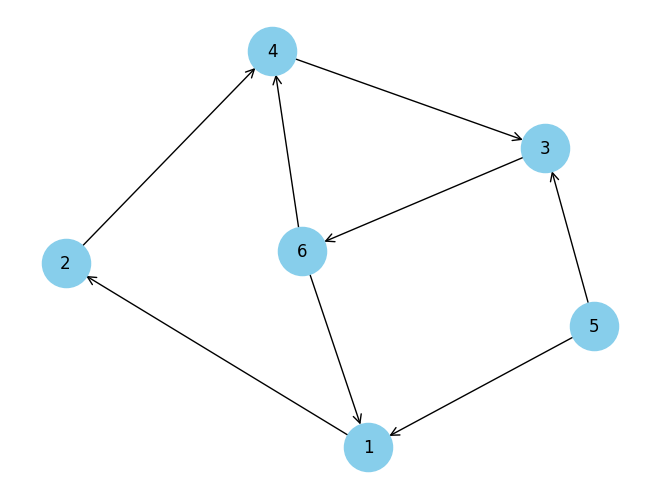

The accessibility matrix :
[[1 1 1 1 0 1]
 [1 1 1 1 0 1]
 [1 1 1 1 0 1]
 [1 1 1 1 0 1]
 [1 1 1 1 1 1]
 [1 1 1 1 0 1]]
_________
The predecessors matrix :
[[1 1 4 2 0 3]
 [6 2 4 2 0 3]
 [6 1 3 6 0 3]
 [6 1 4 4 0 3]
 [5 1 5 2 5 3]
 [6 1 4 6 0 6]]
_________
a path from 1 to 6 is : [1, 2, 4, 3, 6]


In [16]:
M = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 1, 0, 0, 0],
    [1, 0, 1, 0, 0, 0],
    [1, 0, 0, 1, 0, 0]
])

# Plot the graph given by the matrix M
plot_graph(M)

# Applying the Roy Warshall algorithm to find a path
# from a begin node to an end node
# The trace option is disabled you can enable it 
# to see the intermediate matrix used by the algorithm
AC, P = Roy_warshall(M, False)
print("The accessibility matrix :")
print(AC.astype(int))
print("_________")
print("The predecessors matrix :")
print(P)
print("_________")
begin, end = 1, 6
print(f"a path from {begin} to {end} is : {find_path(P, begin, end)}")

# Floyd-Warshall Algorithm

In [17]:
def Floyd_warshall(M, trace=True):
    '''
        An implementation of the Floyd-Warshall algorithm
        to determine the shortest distance matrix modified
        to return the matrix of predecessors too

        Args:
            M (ndarray(n, n)) : Weighted adjacency matrix 
            trace (boolean, optional) : Return the intermediate 
            D^k and P^k for k in {0 ... n-1}
            Default is True
        
        Raise:
            ValueError if a negative weighted cycle is detected
        
        Returns:
            D (ndarray(n, n)) : The shortest distance Matrix
            P (ndarray(n, n)) : The predecessors matrix 
    '''

    # Remainder : 
    #   Let k and n be positive integers,
    #   Let i and j be positive integers such that i < j
    #   Let (i, x_0, ..., x_n, j) be a path from i to j
    #   the matrix of paths of level <= k D^k is a matrix of distances
    #   where D^k[i, j] = min{D[i, j]} where max{x_0, ..., x_n} <= k
    #   the matrix of predecessors of level <= k P^k is a matrix of integers 
    #   where P^k[i, j] = the predecessor of j in a 
    #   path (i, ..., j) of level <= k
    #   -1 if such a path doesn't exist

    # Check if there are any trivial absorbant cycle
    neg = np.where(np.diag(M) < 0)[0]
    if len(neg) != 0:
        index = int(neg[0])+1
        raise ValueError(f"The matrix contains negative weight cycles\n\
            The cycle is : ({index})")
    
    # Initialise D^0
    D = M.copy()
    np.fill_diagonal(D, 0)

    # Initialise P^0
    P = np.full(M.shape, -1, dtype=int)
    for i in range(M.shape[0]):
        for j in range(M.shape[0]):
            # -1 for no predecessor
            if D[i, j] < np.inf: P[i, j] = i

    for k in range(M.shape[0]):
        if trace:
            print(f"D^{k} :")
            print(D)
            print(f"P^{k} :")
            print(P+1)
            print("\n")
        for i in range(M.shape[0]):
            for j in range(M.shape[0]):
                if D[i, j] > D[i, k] + D[k, j]:
                    D[i, j] = D[i, k] + D[k, j] 
                    P[i, j] = P[k, j] 
            neg = np.where(np.diag(D) < 0)[0]
            if len(neg) != 0:
                index = int(neg[0])+1
                raise ValueError(f"The matrix contains negative weight cycles\n\
                                 The cycle is : {find_path(P+1, index, index)}")
    # D^(M.shape[0]) represents the matrix of shortest path distances                
    return D, P+1


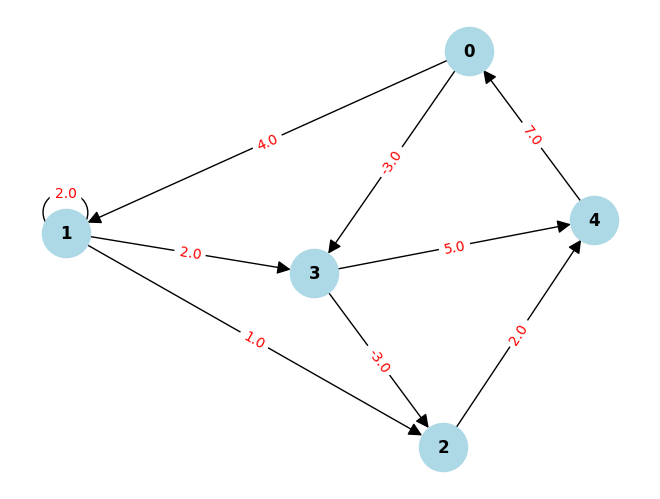

The shortest distances matrix :
[[ 0.  4. -6. -3. -4.]
 [ 8.  0. -1.  2.  1.]
 [ 9. 13.  0.  6.  2.]
 [ 6. 10. -3.  0. -1.]
 [ 7. 11.  1.  4.  0.]]
_________
The predecessors matrix :
[[1 1 4 1 3]
 [5 2 4 2 3]
 [5 1 3 1 3]
 [5 1 4 4 3]
 [5 1 4 1 5]]
_________
a path from 1 to 5 is : [1, 4, 3, 5]


In [18]:
M = np.array([
    [np.inf, 4, np.inf, -3, np.inf],
    [np.inf, 2, 1, 2, np.inf],
    [np.inf, np.inf, np.inf, np.inf, 2],
    [np.inf, np.inf, -3, np.inf, 5],
    [7, np.inf, np.inf, np.inf, np.inf]
])
# plot the graph given by M
plot_weighted_graph(M, 43)
D, P = Floyd_warshall(M, False)

print("The shortest distances matrix :")
print(D)
print("_________")
print("The predecessors matrix :")
print(P)
print("_________")
begin, end = 1, 5
print(f"a path from {begin} to {end} is : {find_path(P, begin, end)}")


# Dijkstra Algorithm

In [19]:
def dijkstra(MD, origin = 1, trace=False):
    '''
        An implementation of the Dijkstra Algorithm

        Args:
            MD (ndarray(n, n)) : The distance matrix representing the graph G
            origin (int, optional) : The node of the origin of the shortest path.
            Default is 1
            trace (boolean, optional) : Return the intermediate 
            d, pi, O and F arrays
            Default is False

        Raise:
            ValueError if the origin node origin doesn't belong to the nodes set
            AssertionError if the Distance matrix contains negative values

        Returns:
            d (ndarray(n)) : The minimal distances, from the node origin, array 
            pi (ndarray(n)) : The array of predecessors in the shortest path 
            from the node origin

    '''
    # Align with the python array indexation
    origin -= 1
    check_pre_condition(origin, MD.shape[0])
    assert np.all(MD >= 0), "The Distance Matrix must contains only positive numbers"
    # n represents the number of sommets
    n = MD.shape[0]

    # Initialise the distances and predecessors arrays
    d, pi = init_dijkstra(n, origin)

    # Initialise the Opens and Closed arrays
    O = np.zeros(n).astype(bool)
    O[origin]= True
    F = np.zeros(n).astype(bool)

    if trace:
        print("iter_0 :")
        print(f"distances array : {d}")
        print(f"predecessors array : {pi+1}")
        print(f"opens array : {O}")
        print(f"closed array : {F}")

    # Main loop
    for i in range(n-1):
        # Find all the nodes u where O[u] and not F[u]
        boucle = np.where(O & ~F)[0]
        if len(boucle) == 0:
            break
        # Take the minimum u, in term of distance d[u]
        u = boucle[np.argmin(d[boucle])]
        succ = Succ(MD, u)
        
        for v in succ:
            relacher(MD, u, v, d, pi)
            O[v] = True
        
        # Update the Closed array
        F[u] = True
        if trace:
            print('_________')
            print(f"iter_{u+1} :")
            print(f"distances array : \n{d}")
            print(f"predecessors array : \n{pi+1}")
            print(f"opens array : \n{O}")
            print(f"closed array : \n{F}")
    
    return d, pi+1

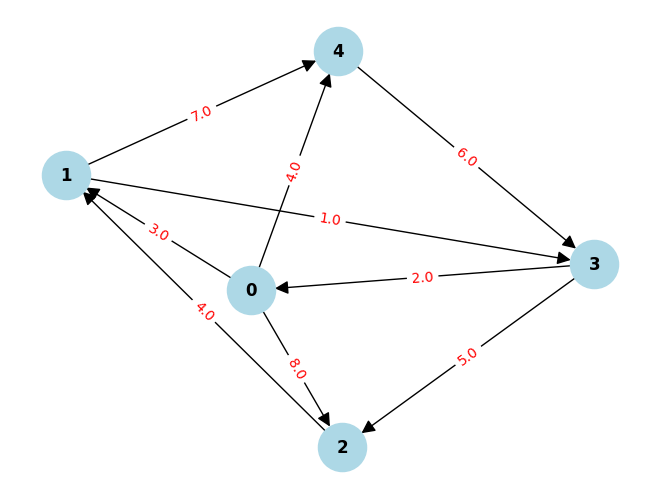

The minimal distances from the node 1:
[0. 3. 8. 4. 4.]
_________
The predecessors in the shortest path from the node 1:
[0 1 1 2 1]
_________
The shortest path from the node 1 to 5:    [1, 5]


In [20]:
MD = np.array([[np.inf, 3, 8, np.inf, 4],
              [np.inf, np.inf, np.inf, 1, 7],
              [np.inf, 4, np.inf, np.inf, np.inf],
              [2, np.inf, 5, np.inf, np.inf],
              [np.inf, np.inf, np.inf, 6, np.inf]])

# plot the graph given by MD
# You can change the seed parameter to visualise the graph differently
plot_weighted_graph(MD, 45)

origin = 1
d, pi = dijkstra(MD, origin)
print(f"The minimal distances from the node {origin}:")
print(d)
print("_________")
print(f"The predecessors in the shortest path from the node {origin}:")
print(pi)
print("_________")
dest = 5
print(f"The shortest path from the node {origin} to {dest}:\
    {shortest_path_from_origin(pi, dest, origin)}")

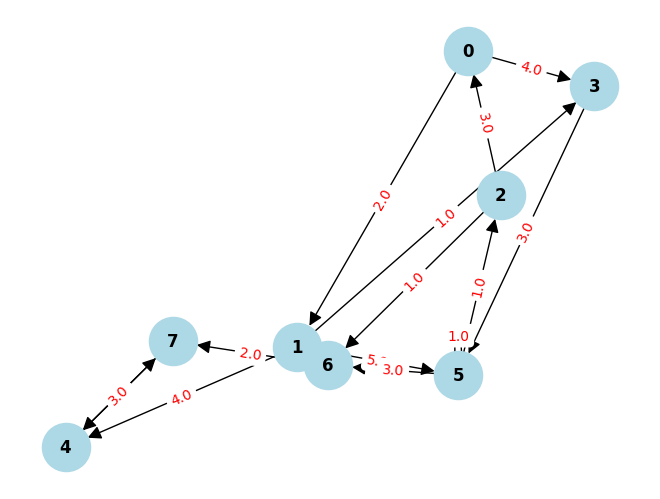

iter_0 :
distances array : [ 0. inf inf inf inf inf inf inf]
predecessors array : [0 0 0 0 0 0 0 0]
opens array : [ True False False False False False False False]
closed array : [False False False False False False False False]
_________
iter_1 :
distances array : 
[ 0.  2. inf  4. inf inf inf inf]
predecessors array : 
[0 1 0 1 0 0 0 0]
opens array : 
[ True  True False  True False False False False]
closed array : 
[ True False False False False False False False]
_________
iter_2 :
distances array : 
[ 0.  2. inf  3.  6.  7. inf inf]
predecessors array : 
[0 1 0 2 2 2 0 0]
opens array : 
[ True  True False  True  True  True False False]
closed array : 
[ True  True False False False False False False]
_________
iter_4 :
distances array : 
[ 0.  2. inf  3.  6.  6. inf inf]
predecessors array : 
[0 1 0 2 2 4 0 0]
opens array : 
[ True  True False  True  True  True False False]
closed array : 
[ True  True False  True False False False False]
_________
iter_5 :
distances array : 
[ 0.

In [21]:
MD = np.array([[np.inf, 2, np.inf, 4, np.inf, np.inf, np.inf, np.inf],
              [np.inf, np.inf, np.inf, 1, 4, 5, np.inf, np.inf],
              [3, np.inf, np.inf, np.inf, np.inf, np.inf, 1, np.inf],
              [np.inf, np.inf, np.inf, np.inf, np.inf, 3, np.inf, np.inf],
              [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 1],
              [np.inf, np.inf, 1, np.inf, np.inf, 1, 3, np.inf],
              [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 2],
              [np.inf, np.inf, np.inf, np.inf, 3, np.inf, np.inf, np.inf],
              ])

# plot the graph given by MD
# You can change the seed parameter to visualise the graph differently
plot_weighted_graph(MD, 45)

origin = 1
d, pi = dijkstra(MD, origin, True)

In [22]:
# Dijkstra using a binary heap:
class Heap:
    nodes_ = None
    priorities_ = None
    
# Dijkstra using a fibbunacci heap:

# Bellman-Ford Algorithm

In [23]:
def Bellman_Ford(M, origin = 1):
    """
        An implementation of the Bellman-Ford algorithm
        to find the shortest path from the origin node

        Args:
            M (ndarray(n, n)) : The distances matrix
            origin (int, optional) : The origin node
            Default is 1
        
        Returns:
            d (ndarray(n)) : The shortest distances from the origin
            node array
            pi (ndarray(n)) : The predecessor in the shortest path
            from the origin node array
    """
    origin -= 1
    # Initialisation of the distances and predecessors arrays
    d, pi = init_dijkstra(M.shape[0], origin)

    # arcs contains the list of edges of the graph represented
    # by the distances matrix M
    arcs = Arcs(M)

    for init, final, _ in arcs:
        # The relaxation process for each edge of the graph
        relacher(M, init, final, d, pi)
        
    return d, pi+1
    

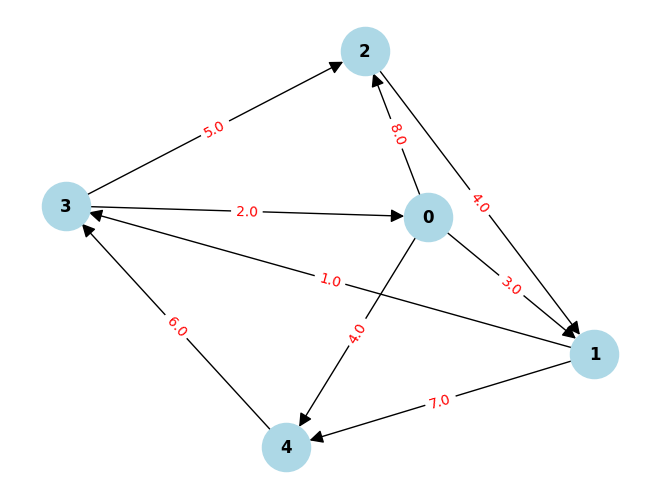

The minimal distances from the node 1:
[0. 3. 8. 4. 4.]
_________
The predecessors in the shortest path from the node 1:
[0 1 1 2 1]
_________
The shortest path from the node 1 to 4:    [1, 2, 4]


In [24]:
MD = np.array([[np.inf, 3, 8, np.inf, 4],
              [np.inf, np.inf, np.inf, 1, 7],
              [np.inf, 4, np.inf, np.inf, np.inf],
              [2, np.inf, 5, np.inf, np.inf],
              [np.inf, np.inf, np.inf, 6, np.inf]])

# plot the graph given by MD
# You can change the seed parameter to visualise the graph differently
plot_weighted_graph(MD, 47)

origin = 1
d2, pi2 = Bellman_Ford(MD, origin)
print(f"The minimal distances from the node {origin}:")
print(d2)
print("_________")
print(f"The predecessors in the shortest path from the node {origin}:")
print(pi2)
print("_________")
dest = 4
print(f"The shortest path from the node {origin} to {dest}:\
    {shortest_path_from_origin(pi2, dest, origin)}")

# Depth First Search (DFS)

In [25]:
def visited_init(adj_dict):
    '''
        An auxillary function to initialise the visited 
        array in a protected way for use in depth_first_search

        Args:
           adj_dict (dict) : The adjacency list of the graph G
        
        Returns:
            visited (list) : The initialised visited list
    '''
    return np.zeros(len(adj_dict)).astype(bool)

def depth_first_search(adj_dict, origin, visited, out, post=False):
    '''
        The Depth First Traversal of a weighted oriented Graph
        given by its distances matrix from an origin vertex

        Args:
            adj_dict (dict) : The adjacency list of the graph G
            {vertex : [neighbours_of_vertex]}
            origin (int) : The vertex from where we will start the traversal
            visited (list) : The initialisation of the visited array
            it must be a list of booleans all False
            It is recommanded to use the auxilary function visited_init(adj_dict)
            out (list) : The traversal list, it used for the output
            It must be an empty list
            post (bool, optional) : If True we'll make a post order traversal.
            Default is False
        
        Raise:
            ValueError if the origin is out of range

        Warning:
            Due to the recursive implementation there is no way to check 
            the veracity of the visited and output arguments so respect
            the description above 
    '''
    # Check that the origin belongs to the vertices set
    check_pre_condition(origin, len(adj_dict))

    # Check the length of the visited array
    assert len(visited) == len(adj_dict), "The length of visited must be equals to\
        the length of adj_dict"
    
    # change the state of the current vertex to visited
    visited[origin] = True
    if not post:        
        # add it to the output list
        out.append(int(origin)) 
    
    # Traverse the neighbours of the current vertex
    for neighbour in adj_dict[origin]:
        if not visited[neighbour]:
            # The recursive call
            depth_first_search(adj_dict, neighbour, visited, out, post)
    if post:        
        # add it to the output list
        out.append(int(origin))        

In [26]:
def dfs(adj_dict, post=False):
    '''
        The Depth First Traversal of a weighted oriented Graph
        given by its distances matrix

        Args:
            adj_dict (dict) : The adjacency list of the graph G
            {vertex : [neighbours_of_vertex]}
            post (bool, optional) : If True we'll make a post order traversal.
            Default is False
 
        Returns:
            out (list) : The traversal list
    '''
    # Initialise safely The visited and out args
    visited = visited_init(adj_dict)
    out = []                           
    
    for origin in range(len(adj_dict)):
        if not visited[origin]:
            depth_first_search(adj_dict, origin, visited, out, post)
        if np.all(visited):
            break

    return out

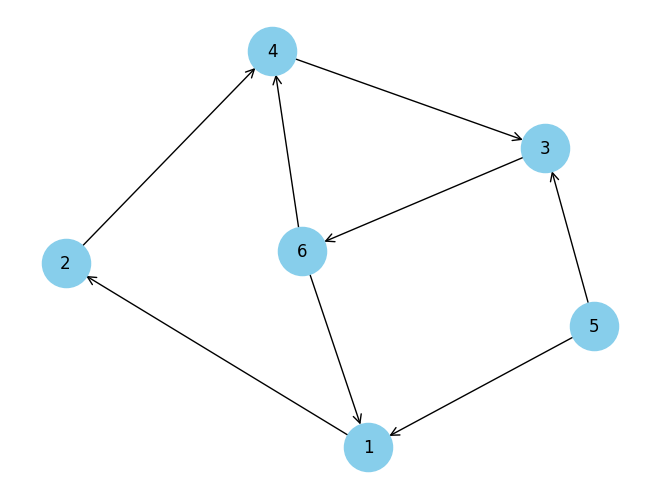

The Depth first traversal from the vertex 1 :  [1 2 4 3 6]
_________
The Depth first traversal from the vertex 2 :  [2 4 3 6 1]


In [27]:
M = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 1, 0, 0, 0],
    [1, 0, 1, 0, 0, 0],
    [1, 0, 0, 1, 0, 0]
])

# Convert the adjacency matrix to an adjacency list
adj_dict = deMaTL(M, plusOne=False)

# You can change the seed parameter to visualise the graph differently
plot_graph(M)

origin = 1
out = []
depth_first_search(adj_dict, origin - 1, visited_init(adj_dict), out)
out = np.array(out) + 1
print(f"The Depth first traversal from the vertex {origin} :  {out}")
print("_________")
origin, out = 2, []
depth_first_search(adj_dict, origin - 1, visited_init(adj_dict), out)
out = np.array(out) + 1
print(f"The Depth first traversal from the vertex {origin} :  {out}")

# Bredth First Search (BFS)

In [28]:
from collections import deque
def bredth_first_search(adj_dict, origin):
    '''
        The Breadth First Search for a graph G given
        by its adjacency list executed from a vertex origin

        Args:
            adj_dict (dict) : The adjacency list of the graph G
            {vertex : [neighbours_of_vertex]}
            origin (int) : The vertex on which we will start the BFS
        
        Raise:
            ValueError if the origin is out of range

        Returns:
            out (list) : The vertices visited and ordered by the BFS
    '''
    # Check that the origin belongs to the vertices set
    check_pre_condition(origin, len(adj_dict))
    
    # Visited boolean array to avoid processing the same 
    # vertex more than one time
    visited = np.zeros(len(adj_dict)).astype(bool)

    # Initialise the FIFO queue
    pile = deque([origin])

    visited[origin] = True
    # Initialise the output list that contains the BFS
    out = []

    # Repeat until the queue is empty
    while len(pile) != 0:
        # Dequeue the vertex the queue
        vertex = pile.popleft()

        # Add it to the output list
        out.append(vertex)

        # Iterate over the neighbours of the current vertex
        for neighbour in adj_dict[vertex]:
            # Enqueue the unvisited neighbours and set them to true
            if not visited[neighbour]:
                pile.append(neighbour)
                visited[neighbour] = True
    return out

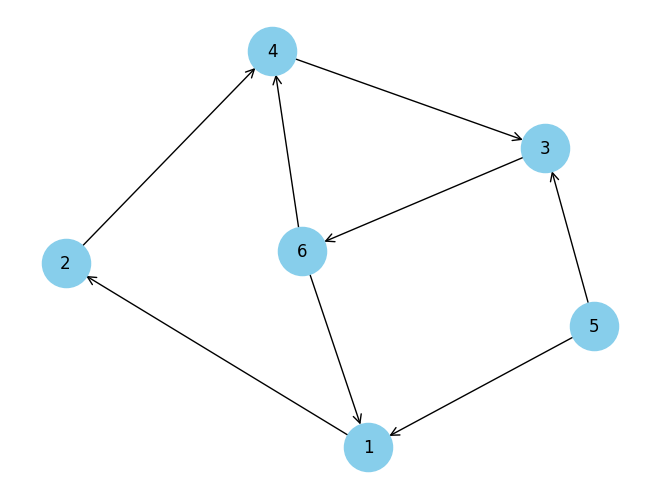

The Depth first traversal from the vertex 1 :  [1 2 4 3 6]
_________
The Depth first traversal from the vertex 5 :  [5 1 3 2 6 4]
_________


In [29]:
M = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 1, 0, 0, 0],
    [1, 0, 1, 0, 0, 0],
    [1, 0, 0, 1, 0, 0]
])

# Convert the adjacency matrix to an adjacency list
adj_dict = deMaTL(M, plusOne=False)

# Plot the graph for better visualisation
plot_graph(M)
origin = 1
out = bredth_first_search(adj_dict, origin - 1)
out = np.array(out) + 1
print(f"The Depth first traversal from the vertex {origin} :  {out}")
print("_________")  
origin = 5
out = bredth_first_search(adj_dict, origin - 1)
out = np.array(out) + 1
print(f"The Depth first traversal from the vertex {origin} :  {out}")
print("_________")  

# Tarjan Algorithm 


In [30]:
def tarjan(adj_dict):
    '''
        Tarjan algorithm to find strongly connected components
        of an oriented graph G given by its adjacency list

        Args:
            adj_dict (dict) : The adjacency list of the graph G
            {vertex : [neighbours_of_vertex]}
        
        Returns:
            sccs (list) : a list of strongly connected components 
    '''

    # n represents the number of vertices of the graph
    n = len(adj_dict)
    # initialise the array of ids ordered by their DFS
    # appearing order
    ids = np.full(n, -1, dtype=int)

    # the low link array, such that: for i in {0 .. n-1},
    # low[i] is the smallest id of vertices id reachable from
    # vertex i - according to ids array -
    low = np.zeros(n, dtype=int)

    # to check wether a vertex i is in the stack
    on_stack = np.zeros(n, dtype=bool)
    # initialise an empty stack
    stack = []

    id_counter = [0]
    # Initialise the Strongly connected components list
    sccs = []

    # A modified DFS for the Tarjan algorithm
    def dfs_tarjan(at):
        # A counter to ennumerate the vertices according
        # to their appearence order in the DFS
        id_counter[0] += 1

        # We set new ids for vertices according to their
        # order in the DFS
        # Initialise the low key value to its id
        # NB : each vertex is reachable from itself
        ids[at] = low[at] = id_counter[0]
        
        # Push the vertex in the stack
        stack.append(at)
        on_stack[at] = True

        for to in adj_dict[at]:
            # recursive call to pursue the DFS
            # if 'to' isn't visited yet
            if ids[to] == -1:
                dfs_tarjan(to)
                # Update the low link value
                # NB: 'to' is reachable from 'at'
                low[at] = min(low[at], low[to])
            elif on_stack[to]:
                # Update the low link value if
                # the vertex is in the stack
                # NB: 'to' is reachable from 'at'
                low[at] = min(low[at], ids[to])

        # If we find a root of a SCC
        if ids[at] == low[at]:
            scc = []
            # Pop the stack elements until 
            # reaching the 'at' vertex in the SCC list
            while True:
                node = stack.pop()
                on_stack[node] = False
                scc.append(node + 1)
                if node == at:
                    break
            
            # Add the SCC of root 'at' to the sccs list
            sccs.append(scc[::-1])

    # Starting the DFS in all vertices
    # so it traverses all the graph
    for i in range(n):
        # if vertex i is unvisited yet
        if ids[i] == -1:
            dfs_tarjan(i)

    return sccs          


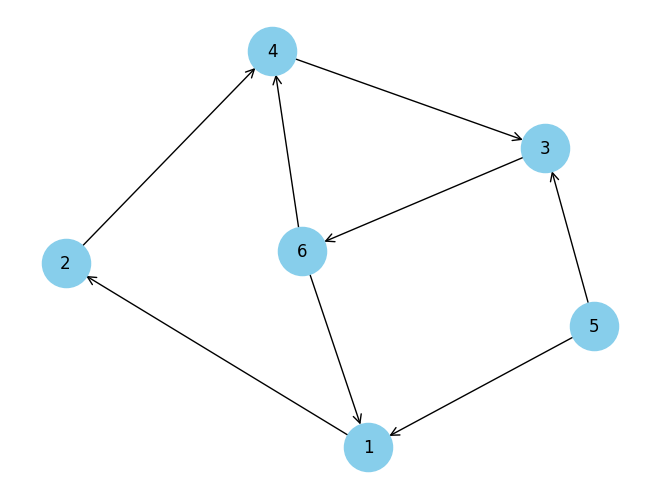

The Strongly Connected Components of adj_dict are :


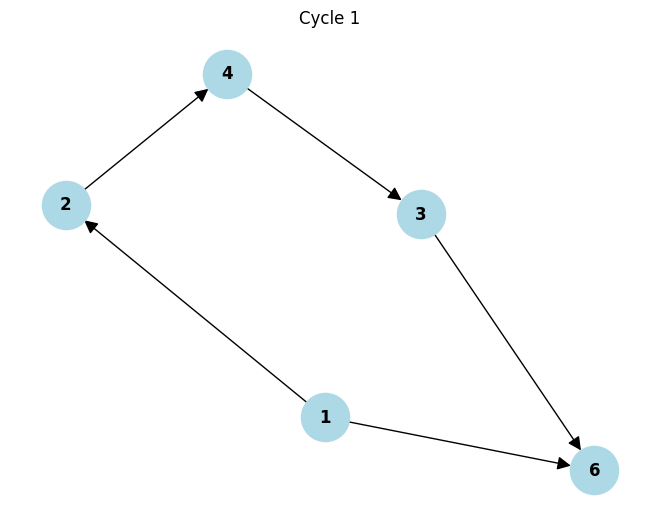

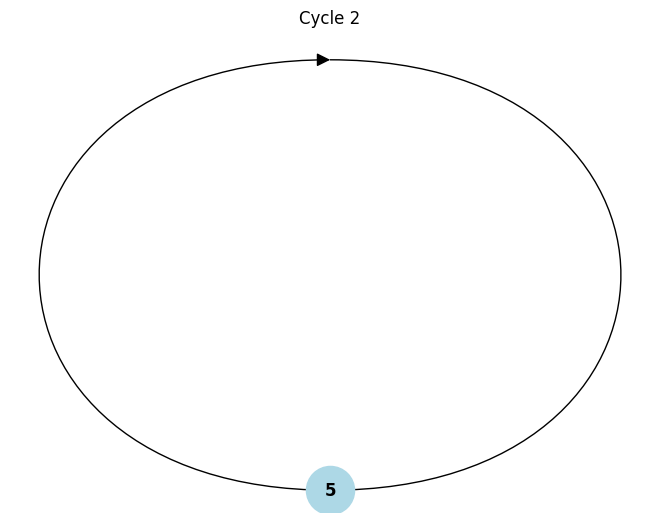

In [31]:
M = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 1, 0, 0, 0],
    [1, 0, 1, 0, 0, 0],
    [1, 0, 0, 1, 0, 0]
])

# Convert the adjacency matrix to an adjacency list
adj_dict = deMaTL(M, plusOne=False)

# Plot the graph for better visualisation
plot_graph(M)

# Print the Strongly Connected Components of the
# graph represented by adj_dict
print("The Strongly Connected Components of adj_dict are :")
i = 0
for scc in tarjan(adj_dict):
    i += 1
    cycle_draw(scc, f"Cycle {i}") 

# Topological Sort


In [ ]:
def topological_sort(adj_dict, random=False):
    '''
        Topological sort of an oriented graph G given by its
        successors list.

        Args:
            adj_dict (dict) : The adjacency list of the graph G
            {vertex : [neighbours_of_vertex]}
            
            random (bool, optional) : if False, procede by the
            ids order in adj_dict. Else, using a random order
            Default is False

        Raise:
            AssertionError if G isn t a directed acycled graph (DAG)

        Returns:
            sorted_vertices (ndarray (n,)) : The topological sort from left to right   
    '''

    # We check that the number of SCC is the number of vertices
    assert len(tarjan(adj_dict)) == len(adj_dict), "There's no topological \
        sort in cycled grahes"  
    
    sorted_vertices = []
    # Initialise safely The visited and out args
    visited = visited_init(adj_dict)
    out = []  

    # Choose the order of vertices
    vertices = np.arange(len(adj_dict))   
    if random:
        np.random.shuffle(vertices)  
                        
    for origin in vertices:
        if not visited[origin]:
            # The visited vertices by the dfs from vertex origin
            depth_first_search(adj_dict, origin, visited, out, post=True)

            # Concatenate inversed order results from the left 
            sorted_vertices = out[::-1] + sorted_vertices 

            # re-initialise the out array so we only get the visited vertices
            # from the vertex origin
            out = []   
        # If all vertices visited we stop 
        if np.all(visited):
            break
            
    return np.array(sorted_vertices)

In [ ]:
def topological_index(adj_dict):
    '''
        Find a topological indexing of a graph 
        - rename the vertices, so they match a topological sort

        Args:
            adj_dict (dict) : The adjacency list of the graph G
            {vertex : [neighbours_of_vertex]}
    '''
    out = {}
    sort = list(topological_sort(adj_dict))
    for id in adj_dict:
        neighbours = []
        for succ in adj_dict[id]:
            neighbours.append(sort.index(succ)) 
        out[sort.index(id)] = neighbours
    return out   

In [67]:
def valid_topo_sort(adj_dict, sort):
    """
        Check if a given sorting is a topological sort of 
        the graph given by adj_dict

        Args:
            adj_dict (dict) : The adjacency list of the graph G
            {vertex : [neighbours_of_vertex]}

            sort (list) : the sort we are willing to check if
            it is topological
    """
    n = len(adj_dict)
    for u in range(n-1):
        for v in range(u, n):
            # the index operation of python is considered as a bijection
            # between the vertex in the original graph i and the sorted
            # graph sort[i]

            # let u' and v' be two vertices of the sorted graph,
            # we are checking if (u' < v') and (u' is a successor of v')
            # (translated by : u' in Succ[v']) 
            # which means that it is not a valid topological sort 
            # u' = sort[u] is the image of u by the defined bijection above,
            # without a loss of generality for v'   
            if sort[u] in adj_dict[sort[v]]:
                print("problem with vertices : ", sort[u], sort[v])
                return False
            
    return True

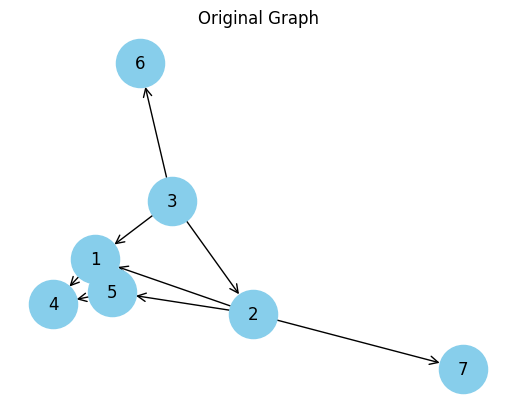

A topological sort of adj_dict is :
[2 5 1 6 4 0 3]
Valid topological sort!
{5: [6], 2: [5, 4, 3], 0: [5, 2, 1], 6: [], 4: [6], 1: [], 3: []}


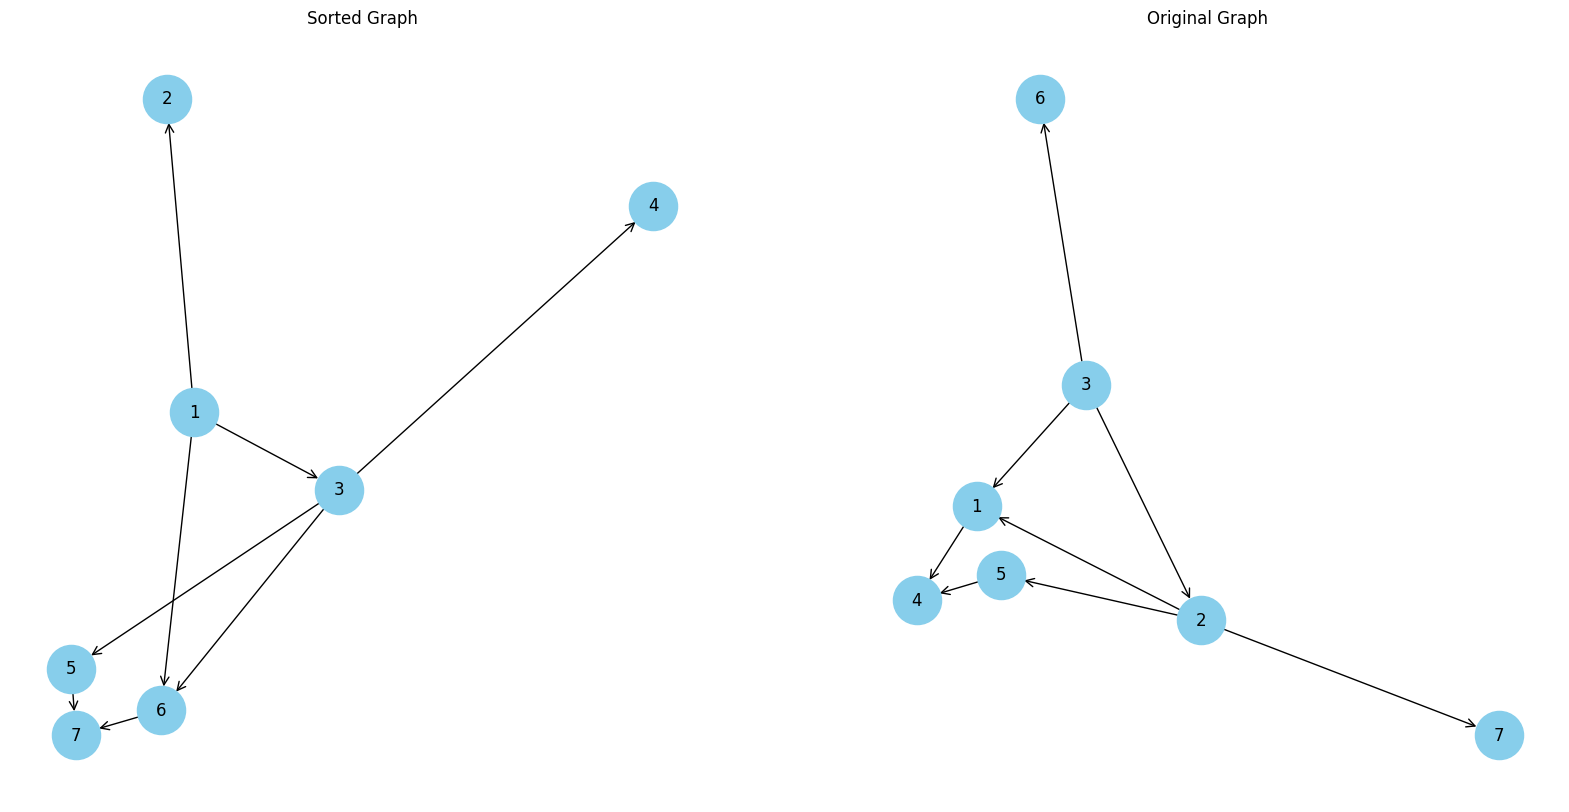

In [68]:
M = np.array([
    [0, 0, 0, 1, 0, 0, 0],
    [1, 0, 0, 0, 1, 0, 1],
    [1, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0]
])

# Convert the adjacency matrix to an adjacency list
adj_dict = deMaTL(M, plusOne=False)

# Plot the graph for better visualisation
plt.title("Original Graph")
plot_graph(M)

# Print a topological sort of the
# graph represented by adj_dict
print("A topological sort of adj_dict is :")
topo_sort = topological_sort(adj_dict, random=False)
print(topo_sort)

# check if it's a valid topological sort
if valid_topo_sort(adj_dict, topo_sort):
    print("Valid topological sort!")
    # print the sorted graph  
    print(topological_index(adj_dict))
    # plot the sorted graph
    plt.figure(figsize=(20, 10))
    plt.subplot(121), plt.title("Sorted Graph")
    plot_graph(deTLaM(topological_index(adj_dict)), seed=100, show=False)
    plt.subplot(122), plt.title("Original Graph")
    plot_graph(M, show=False)
    plt.show()
else:
    print("Not valid topological sort!")   

# Union-Find

In [69]:
def discrete_forest(edges_list):
    '''
        Discrete Forest of a graph G, each vertex is considered as an arborescence

        Args:
            edge_list (list) : the list of edges of the graph. Under the format
            [(v_begin, v_end)] where v_begin and v_end are vertices of the graph 
        
        Returns:
            pi (ndarray(|G|)) : The array of predecessors of G
    '''
    max_ = max(max(u, v) for u, v in edges_list)
    return -np.ones(shape=max_, dtype=int)

def root(pi, v):
    """
        Find the root of a node v using the predecessors list
    """
    # align v with the python indexing
    v -= 1 
    # we loop until reaching the root caracterized by pi[root] == -1
    while pi[v] != -1:
        # we keep going up in the arborescence
        v = pi[v]
    return v

def union(pi, r1, r2):
    # attach the node r1 to r2
    if r1 != r2:
        pi[r1] = r2

def connex_component(edges_list):
    # initialise a discrete forest
    pi = discrete_forest(edges_list)
    for v_begin, v_end in edges_list:
        r1 = root(pi, v_begin)
        r2 = root(pi, v_end)
        union(pi, r1, r2)
        print(f"Union {r1} and {r2}: {pi}")
        print("_________")
    
    return pi

In [70]:
edge_list = [(3, 4), (6, 8), (1, 2), (5, 6), (9, 10), (7, 8), (4, 5), (11, 10), (4, 6), (2, 8), (12, 10)]
connex_component(edge_list)

Union 2 and 3: [-1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1]
_________
Union 5 and 7: [-1 -1  3 -1 -1  7 -1 -1 -1 -1 -1 -1]
_________
Union 0 and 1: [ 1 -1  3 -1 -1  7 -1 -1 -1 -1 -1 -1]
_________
Union 4 and 7: [ 1 -1  3 -1  7  7 -1 -1 -1 -1 -1 -1]
_________
Union 8 and 9: [ 1 -1  3 -1  7  7 -1 -1  9 -1 -1 -1]
_________
Union 6 and 7: [ 1 -1  3 -1  7  7  7 -1  9 -1 -1 -1]
_________
Union 3 and 7: [ 1 -1  3  7  7  7  7 -1  9 -1 -1 -1]
_________
Union 10 and 9: [ 1 -1  3  7  7  7  7 -1  9 -1  9 -1]
_________
Union 7 and 7: [ 1 -1  3  7  7  7  7 -1  9 -1  9 -1]
_________
Union 1 and 7: [ 1  7  3  7  7  7  7 -1  9 -1  9 -1]
_________
Union 11 and 9: [ 1  7  3  7  7  7  7 -1  9 -1  9  9]
_________


array([ 1,  7,  3,  7,  7,  7,  7, -1,  9, -1,  9,  9])